# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

Problem Statement: Justify whether or not E-news Express should use an old landing page over a new landing page. Additionally, examine user behavior across different languages and make recommendations accordingly.

Objectives: * Use A/B testing to come up with statistically significant recommendations.
* Use data vizualization to draw conclusions about the data. 

## Import all the necessary libraries

In [3]:
import scipy
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [4]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [10]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [11]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [12]:
# check the number of rows and columns in the dataset:
df.shape

(100, 6)

In [19]:
# statistical summary of the dataset:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [14]:
# check for null values in the dataset
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

The dataset does not have any null values.

In [ ]:
# check for duplicate values in the dataset

In [16]:
df.duplicated().sum()

0

There are no duplicate values in the dataset.

### Univariate Analysis

**Observations on time_spent_on_page**:

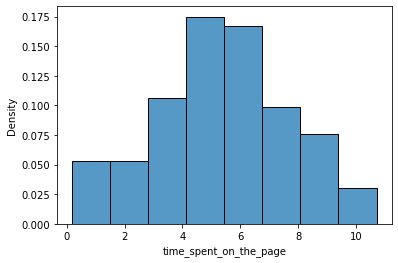

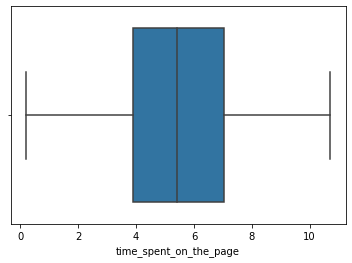

In [23]:
sns.histplot(data=df,x='time_spent_on_the_page',stat='density')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

Time spent on the page appears normally distributed and unskewed. There are no outliers, and the range of the data is about ten minutes. 

**Observations on group:**

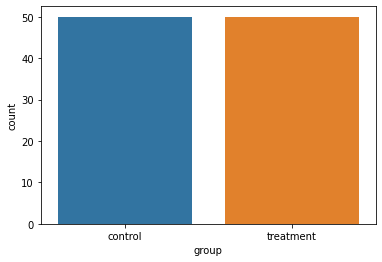

In [29]:
sns.countplot(data=df,x='group')
plt.show()

The control group is the same size as the treatment group, which is to be expected because the treatment group will be compared against the control group.

**Observations on landing_page:**

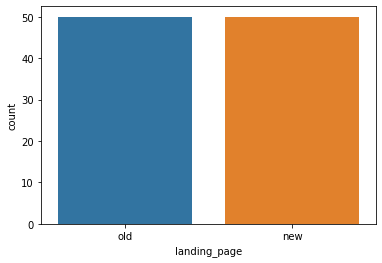

In [31]:
sns.countplot(data=df,x='landing_page')
plt.show()

Presence of the new vs. old landing page will be compared against one another so they should be of the same size, and as the graph above proves, they are. 

**Observations on converted:**

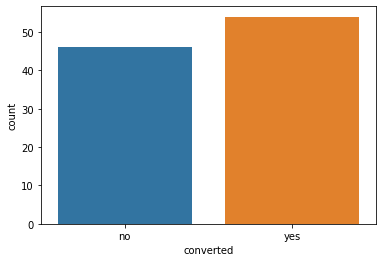

In [33]:
sns.countplot(data=df,x='converted')
plt.show()

The number of converted users appears to be about ten higher than the unconverted users, which leads me to believe there is a chance the null hypothesis will be rejected.

**Observations on language_preferred:**

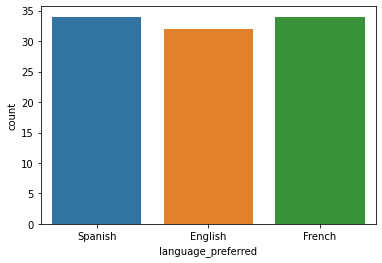

In [34]:
sns.countplot(data=df,x='language_preferred')
plt.show()

Spanish, English, and French are all almost equally preferred, with English slightly less preferred than the other two. 

### Bivariate Analysis

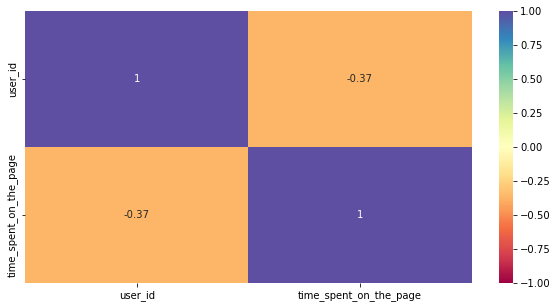

In [35]:
# Let's take a look at a heat map:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

The findings above are not very useful. 

**Observations on group vs. time_spent_on_the_page:**

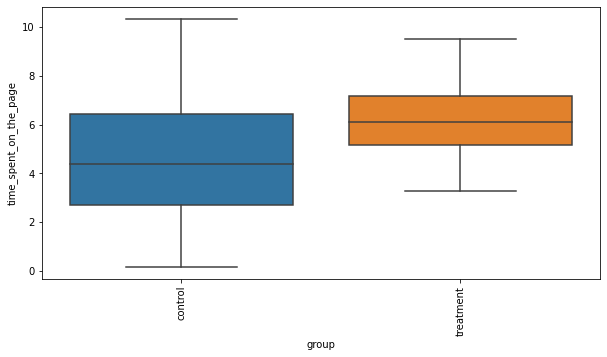

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='group',y='time_spent_on_the_page',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

The median of the treatment group is higher than that of the control group, and the range is smaller. 

**Observations on landing_page vs. time_spent_on_page**:

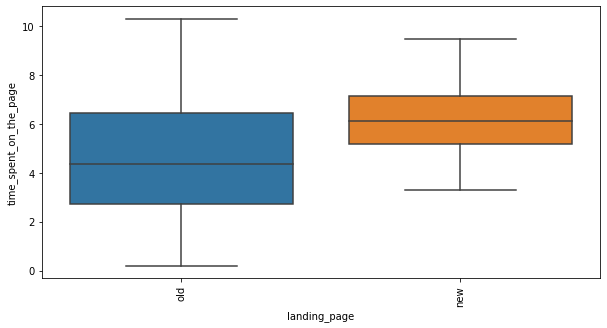

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

group vs. landing_page and group vs. time_spent_on_the_page look almost identical. Let's see if one variable implies another.

In [58]:
df[df['landing_page']=='old']
df[df['landing_page']=='new']

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


It appears that landing_page and treatment are describing the same thing; in every instance where the group is treatment the landing page is also new. Therefore, one of these variables is redundant.

**Observations on landing_page vs. converted:**

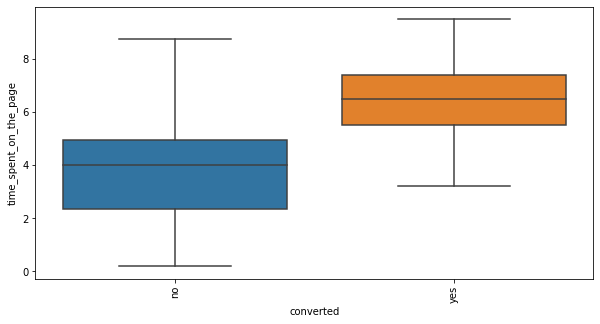

In [63]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

From the boxplot above we can conclude that more time spent on the page usually indicates a higher conversion rate. 

**Observations on language_preferred vs. time_spent_on_the_page:** 

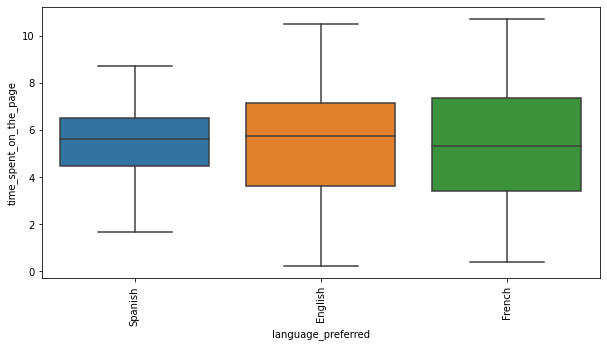

In [64]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

The median of the time spent on the page for the three languages appears to be almost the same, but the range is much larger for both English and French.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

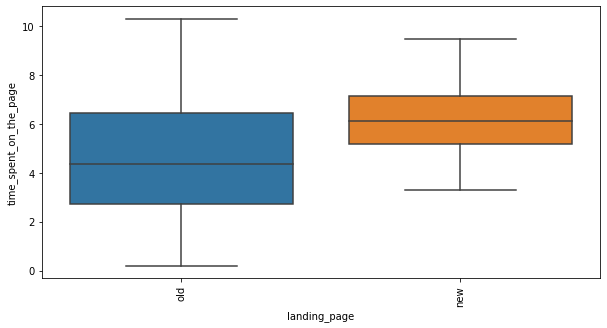

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

### Step 1: Define the null and alternate hypotheses

Null hypothesis: mean time spent on existing landing page = mean time spent on new landing page

Alternative hypothesis: mean time spent on new landing page > mean time spent on existing landing page

### Step 2: Select Appropriate test

two-sample Z test

### Step 3: Decide the significance level

5%

### Step 4: Collect and prepare data

In [73]:
# calculate the means of both groups
df['time_spent_on_the_page'].groupby(df['group']).mean()


group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

In [76]:
# calculate the standard deviations of both groups
df['time_spent_on_the_page'].groupby(df['group']).std()

group
control      2.581975
treatment    1.817031
Name: time_spent_on_the_page, dtype: float64

### Step 5: Calculate the p-value

In [3]:
# user-defined function to compare the equality of two means from two independent populations, where population standard deviations are known
# this function returns the p-value for one tailed test
# for two-tailed test, multiply the p-value by 2
# To know more about the derivation of test statistic and standard error formula, please refer to the monographs and additional materials
def ztest_2samp(X1, X2, pop_sd1, pop_sd2, n1, n2):
    from numpy import sqrt
    from scipy.stats import norm
    se = sqrt(pop_sd1**2/n1 + pop_sd2**2/n2)
    test_stat = ((X1 - X2 - 0)/ se)      
    pval = 1 - norm.cdf(abs(test_stat)) # calculate the one-tailed p-value

    #The abs() function is used to calculate the absolute value of the input. 
    #For example, abs(-5) = 5.
    
    return pval # return the p-value
                 
p=ztest_2samp(4.5324,6.2232,2.581975,1.817031,50,50)  
print("p is " + str(p))

p is 7.630907749855975e-05


### Step 6: Compare the p-value with $\alpha$

The p value is p is 7.630907749855975e-05, which is lower than alpha.

### Step 7:  Draw inference

Because the p value is lower than alpha we can reject the null hypothesis, and we can assume users spend more time on the new landing page than on the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

a. Null hypothesis: the conversion rate for the new landing page is equal to the conversion rate of the old landing page.

Alternative hypothesis: the conversion rate for the new landing page is greater than the conversion rate of the old landing page. 

b. Appropriate test: Two Proportion Z Test
c. Significance level: 5%

In [7]:
# d. Collect and prepare data:
df['converted'].groupby(df['group']).value_counts()

group      converted
control    no           29
           yes          21
treatment  yes          33
           no           17
Name: converted, dtype: int64

In [9]:
# e. Calculate the p value: 
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users
conversion_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conversion_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


f. Compare the p-value with alpha: The p value is less than alpha.


g. Draw inference: Since the p value is less than alpha, we can reject the null hypothesis and conclude that the conversion rate for the new landing page is greater than the conversion rate for the old landing page. 

## 3. Is the conversion and preferred language are independent or related?

a. Null hypothesis: The conversion rate and preferred language are independent.
   Alternative hypothesis: Conversion rate depends on the preferred language. 
   
   
b. Appropriate test: Chi Square Test for Independence 


c. Significance level: 5%

In [28]:
# d. Collect and prepare data:
df['converted'].groupby(df['language_preferred']).value_counts()


#e. Calculate the p value: 
#import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(df['converted'].groupby(df['language_preferred']).value_counts())
print('The p-value is', p_value)

The p-value is 1.0


g. The p-value is 1.0, so we fail to reject the null hypothesis and conclude that preferred language and conversion rate are independent of one another.

## 4. Is the time spent on the new page same for the different language users?

a. Null hypothesis: mean time Spanish speakers spend on the new page = mean time English speakers spend on the new page = mean time French speakers spend on the new page
   Alternative hypothesis: at least one of the means of the different language users is different
b. Appropriate test: Shapiro-Wilkes test and 
c. Significance level: 5%

In [19]:
# d. Collect and prepare data: 
df.loc[df['landing_page']=='new'].groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [30]:
#e. calculate the p-value
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


f. Compare the p-value with alpha: The p-value is much larger than alpha.
g. Draw inference: We fail to reject the null hypothesis and conclude the time spent on the new page is the same for different language users.

## Conclusion and Business Recommendations

On average users spend more time on the new landing page than the old landing page, indicating increased interest in the new page and/or better design. Additionally, the conversion rate of the new landing page is higher than that of the old. Because of these two factors, I recommend the business adopts the new landing page.

Time spent on the new page does not differ across language users, and conversion rate appears independent of the preferred language, so it is not necessary to review the transcribing and translation of the content across different languages.


___